In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve,auc  
from sklearn.model_selection import KFold

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yogim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yogim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_nusax_test = pd.read_csv(r'../../data/nusax/test.csv', header= None)
df_nusax_train = pd.read_csv(r'../../data/nusax/train.csv', header= None)
df_nusax_valid = pd.read_csv(r'../../data/nusax/valid.csv', header= None)

df_nusax = df_nusax_train.append(df_nusax_test, ignore_index=True)
df_nusax = df_nusax.append(df_nusax_valid, ignore_index=True)

df_nusax.columns = ['id','text','label']
df_nusa = df_nusax.drop(columns=['id'])

df_tambahan = df_nusa.drop(index=0)
df_tambahan.head()

,text,label
1,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
2,Kue-kue yang disajikan bikin saya bernostalgia...,positive
3,Ibu pernah bekerja di grab indonesia,neutral
4,Paling suka banget makan siang di sini ayam sa...,positive
5,Pelayanan bus DAMRI sangat baik,positive


In [3]:
df_tugas= pd.read_csv(r'../../data/train_preprocess.tsv.txt', sep='\t', header=None)
df_tugas.columns =['text', 'label']
df_tugas.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
df = df_tambahan.append(df_tugas, ignore_index=True)
df.drop(df.index[df['label'] == 'label'], inplace = True)
df.head()

,text,label
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,Ibu pernah bekerja di grab indonesia,neutral
3,Paling suka banget makan siang di sini ayam sa...,positive
4,Pelayanan bus DAMRI sangat baik,positive


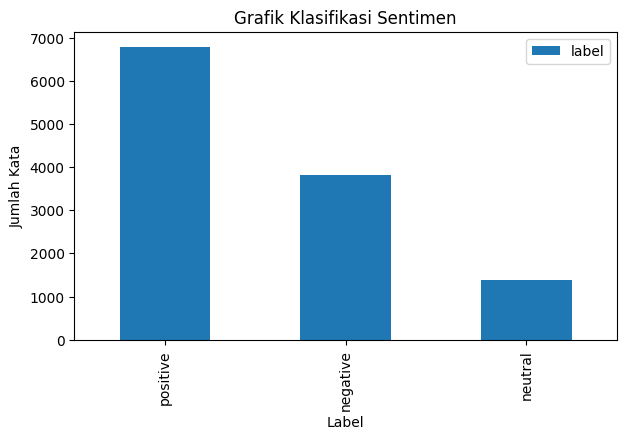

In [5]:
# Chart Klasifikasi Sentimen
df["label"].value_counts().plot.bar(figsize = (7, 4))
plt.title('Grafik Klasifikasi Sentimen')
plt.xlabel('Label')
plt.ylabel('Jumlah Kata')
plt.legend()
plt.show()

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

alay_dict = pd.read_csv(r'../../data/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv(r'../../data/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def cleansing(text):
    text = lowercase(text) 
    text = remove_nonaplhanumeric(text) 
    text = remove_unnecessary_char(text) 
    text = normalize_alay(text) 
    text = stemming(text) 
    text = remove_stopword(text)
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yogim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yogim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df['text'] = df.text.apply(cleansing)
df.head()

,text,label
0,nikmat cicil 0 12 mesan tiket pesawat air asia...,neutral
1,kue kue saji bikin nostalgia tipikal kue zaman...,positive
2,kerja grab indonesia,neutral
3,suka banget makan siang ayam sambal enak bange...,positive
4,layan bus damri,positive


In [8]:
data_preprocessed = df.text.tolist()
type(data_preprocessed)

list

In [9]:
len(data_preprocessed)

12000

Features Extraction

In [10]:
count_vect = TfidfVectorizer()

count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print("Feature Extraction Done !")

Feature Extraction Done !


In [11]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

Test Split

In [12]:
classes = df.label
classes

0         neutral
1        positive
2         neutral
3        positive
4        positive
           ...   
11997    positive
11998    positive
11999     neutral
12000    negative
12001    positive
Name: label, Length: 12000, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size= 0.2)

In [14]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

print("Training Selesai !")

Training Selesai !


In [15]:
pickle.dump(model_mlp, open("model.p", "wb"))

Evaluations

In [16]:
test = model_mlp.predict(X_test)

print("Testing Selesai !")
print(classification_report(y_test, test))

Testing Selesai !
              precision    recall  f1-score   support

    negative       0.75      0.74      0.74       797
     neutral       0.78      0.63      0.69       276
    positive       0.84      0.88      0.86      1327

    accuracy                           0.80      2400
   macro avg       0.79      0.75      0.77      2400
weighted avg       0.80      0.80      0.80      2400



In [18]:
df.label.unique().tolist()

['neutral', 'positive', 'negative']

Predict

In [17]:
original_text = '''
Amin, smg selalu di lancarkan n di mudahkan rejeki nya..
'''

text = count_vect.transform([cleansing(original_text)])

result = model_mlp.predict(text)[0]
print("Sentiment: ", result)

Sentiment:  positive
